In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import animation
import os.path
import utils

In [ ]:
path_save = utils.path_data / 'Meeting_20220630/'
path_save.mkdir()

In [ ]:
sIDs = utils.ExpInfo.getSubjIDs()
task = utils.ExpInfo.taskName[0]


In [ ]:
# delete files
for file in path_save.glob('*'):
    file.unlink()
    
    
sID = sIDs[1]
ctrl = 0.8
ab = 0

# load 
df = utils.LoadData.mouseMovement(sID, task)
d_beh = utils.LoadData.behaviorData(sID, task)
screensize = utils.ExpInfo.getScreenSise(df)

# process
trials = d_beh.query(f"`actual control`=={ctrl} & `angular bias`=={ab} ")
trials = trials['trial no.'].values


# plot and save
for iTrial in trials:
    xy = df.query(f'trialno=={iTrial}')[['x-shift', 'y-shift']].values / screensize
    x = xy[:, 0].cumsum()
    y = xy[:, 1].cumsum()
    fig, ax = plt.subplots(figsize=(6, 6))
    utils.Plot.plot_Traj_withColour(x, y, fig, ax)
    plt.title(f"{sID}, ctrl={ctrl}, ang_{ab}")

    fname = path_save / f"{sID}_trial-{iTrial}_ctrl-{ctrl}_ang-{ab}.png"
    fig.savefig(fname)

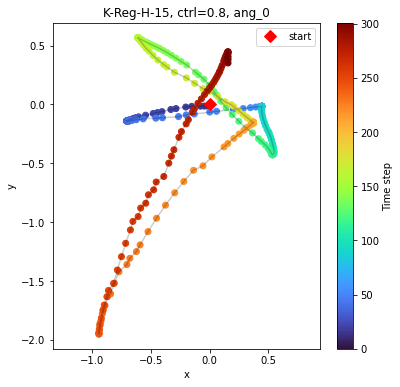

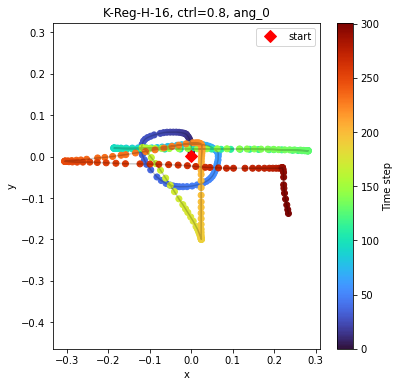

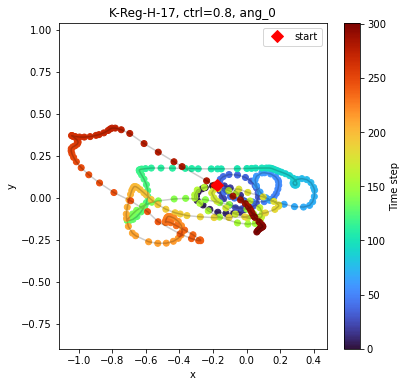

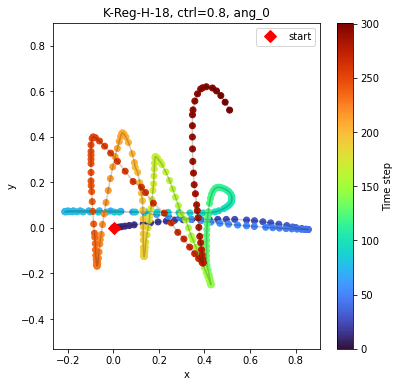

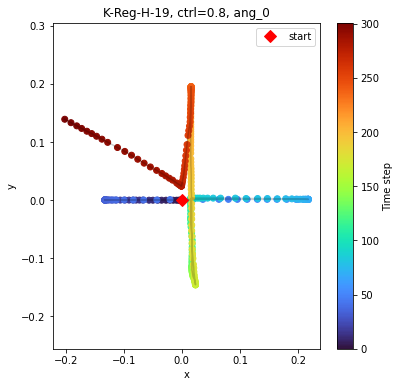

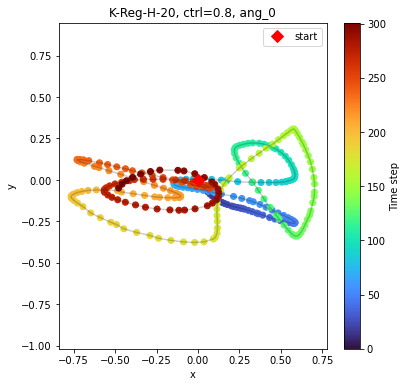

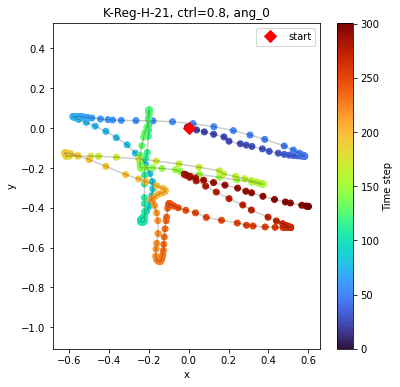

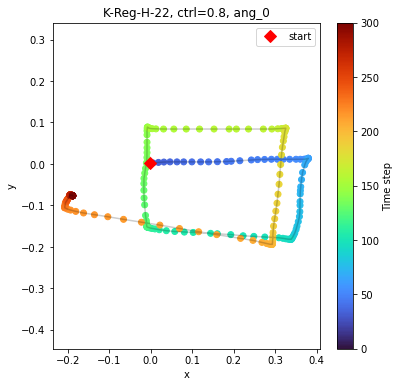

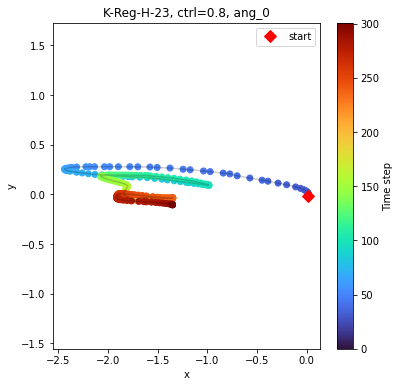

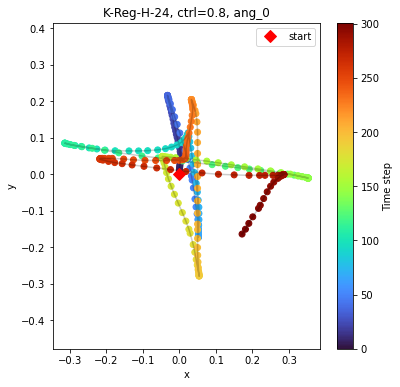

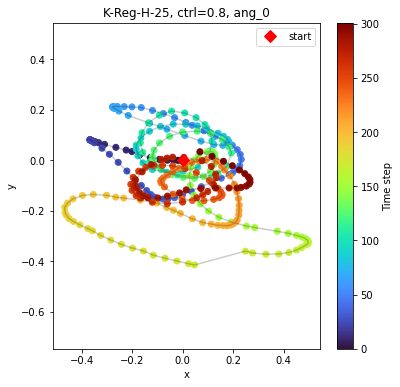

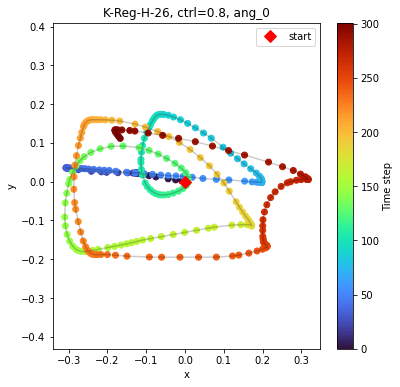

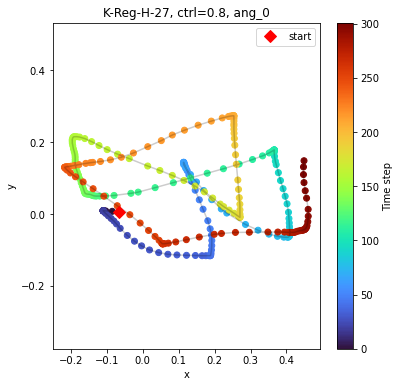

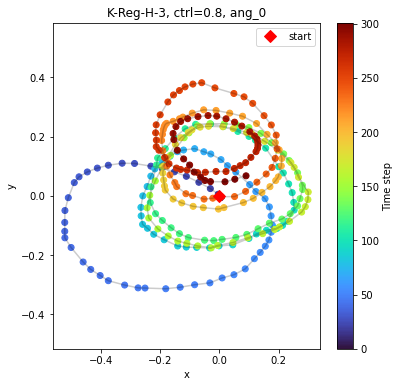

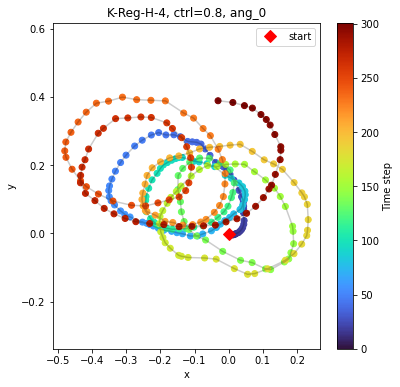

In [38]:
# delete files
for file in path_save.glob('*'):
    file.unlink()
    
    
sID = sIDs[1]
ctrl = 0.8
ab = 0

for sID in sIDs[5:20]:
    # load 
    df = utils.LoadData.mouseMovement(sID, task)
    d_beh = utils.LoadData.behaviorData(sID, task)
    screensize = utils.ExpInfo.getScreenSise(df)

    # process
    trials = d_beh.query(f"`actual control`=={ctrl} & `angular bias`=={ab} ")
    trials = trials['trial no.'].values


    # plot and save
    for iTrial in [trials[2]]:
        xy = df.query(f'trialno=={iTrial}')[['x-shift', 'y-shift']].values / screensize
        x = xy[:, 0].cumsum()
        y = xy[:, 1].cumsum()
        fig, ax = plt.subplots(figsize=(6, 6))
        utils.Plot.plot_Traj_withColour(x, y, fig, ax)
        plt.title(f"{sID}, ctrl={ctrl}, ang_{ab}")

        fname = path_save / f"{sID}_trial-{iTrial}_ctrl-{ctrl}_ang-{ab}.png"
        fig.savefig(fname)
        


# Plot trial data and save to png files

fig, ax = plt.subplots(figsize=(8, 4))
for iTrial in range(1, int(nTrial)+1):
    df_ = df.query(f'trialno == {iTrial}')
    x, y = df_['x-shift'].values, df_['y-shift'].values
    x /= screenSize
    y /= screenSize
    xCum = x.cumsum()
    yCum = y.cumsum()
    colors = np.linspace(0, 1, len(xCum))
    
    plt.cla()
    ax.scatter(xCum, yCum, c=colors, cmap='turbo')
    ax.set_aspect('equal')

    fname_save = './Plot_shift/' + fname_ + f'_{iTrial}.png'
    fig.savefig(fname_save)
    

In [ ]:
# iTrial = 4
# df_ = df.query(f'trialno == {iTrial}')
# x, y = df_['dot-x'].values, df_['dot-y'].values
# x /= screenSize
# y /= screenSize


In [ ]:
# %matplotlib qt
# fig, ax = plt.subplots()
# def update(i):
#     plt.cla()
#     ax.plot(x[i], y[i], 'o')
#     ax.set_xlim([0, x.max()])
#     ax.set_ylim([0, y.max()])   

# ani = animation.FuncAnimation(fig, update, interval=1)
# plt.show()

